# Introduction to subplot

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.linspace(0, 2*np.pi, 400)    # x, y 좌표 크기, ? 
y = np.sin(x**2)

In [26]:
x = np.linspace(0, 2*np.pi, 1000) # 시작 점, ?, 촘촘한 정도 즉, 점의 개수
y = np.sin(x**2) # x 값에 따른 y 좌표값 크기 자동 설정 - sin함수니까 -1 ~ 1 이겠지

# Basic Example and Explanation

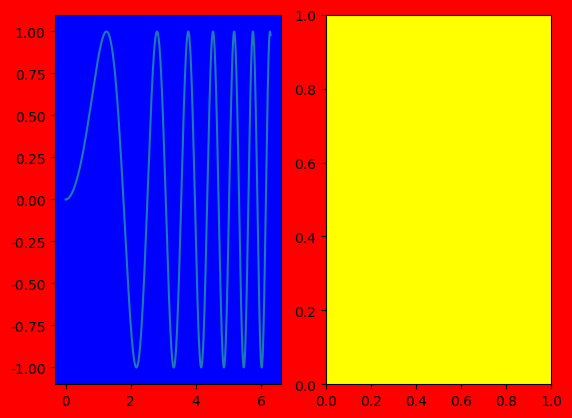

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2) # row 1, column 2
fig.set_facecolor("red")
ax1.set_facecolor("blue")
ax1.plot(x,y)
ax2.set_facecolor("yellow")

# Multiple Rows

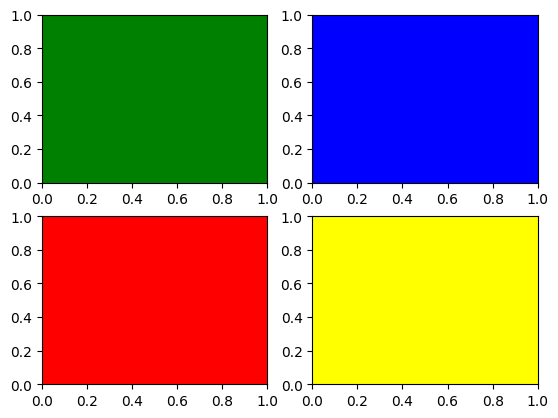

In [4]:
fig, axs = plt.subplots(2,2)
axs[0,0].set_facecolor("green")
axs[0,1].set_facecolor("blue")
axs[1,0].set_facecolor("red")
axs[1,1].set_facecolor("yellow")

# contour 등고선
라인만 있음 
# contourf 색상O 등고선 
보간법을 이용한 색상 채우기

In [17]:
plt.rcParams['axes.unicode_minus'] = False
 
size = 100
x = np.linspace(-2, 2 , size)
y = np.linspace(-1.3, 1.3, size)
 
## 격자형 데이터
X, Y = np.meshgrid(x, y) ## xy 데이터
Z = X*np.exp(-X**2-Y**2) ## z 데이터(높이) e^x - 지수 함수

`exp`는 **지수 함수**를 의미하며, 수학적으로는 \( e^x \), 즉 자연 로그의 밑 \( e \)에 대해 \( e \)의 x제곱을 계산하는 함수입니다. 이 함수는 `numpy`에서 `np.exp()`로 사용됩니다.

### 코드에서 `Z = X * np.exp(-X^2 - Y^2)` 부분 설명:

이 식은 특정 함수의 2D 표면을 표현하고 있습니다. 이를 통해 `Z`는 \( X \)와 \( Y \) 좌표에 따라 변화하는 2D 그리드에서의 "높이"를 나타냅니다. 각각의 \( X \)와 \( Y \) 값에 대해 지수 함수를 사용하여 값을 계산하고, 그 결과로 얻은 `Z` 값을 통해 표면의 형상을 결정합니다.

#### 왜 이렇게 설정했는가?
이 함수는 2D 그리드에서 중심에서 멀어질수록 값이 급격히 감소하는 형태의 분포를 만들기 위해 설정되었습니다. 이 함수의 형태는 **가우시안 분포**와 유사합니다. 구체적으로 다음과 같은 성질을 가지고 있습니다:

1. `X^2 + Y^2` 는 좌표 평면에서 원점으로부터의 거리의 제곱을 나타냅니다.
2. `exp(-X^2 - Y^2)` 는 원점에서 멀어질수록 값이 빠르게 0으로 수렴하는 함수입니다. 이는 원점을 중심으로 점점 값이 줄어드는 종 모양의 곡선을 만듭니다.
3. `X` 를 곱함으로써 값이 원점에서 비대칭적으로 변화하도록 합니다. 이로 인해 x축 방향으로 기울어진 형태의 지수 곡선이 만들어집니다.

결과적으로, 이 식은 **중앙에서 가장 높은 값**을 가지고, 멀어질수록 값이 점점 작아지는 3D 형태의 표면을 표현합니다. 이는 다양한 과학적 시뮬레이션이나 시각화에서 사용되며, 2D 그리드 위에서 특정 패턴을 표현할 때 유용합니다.


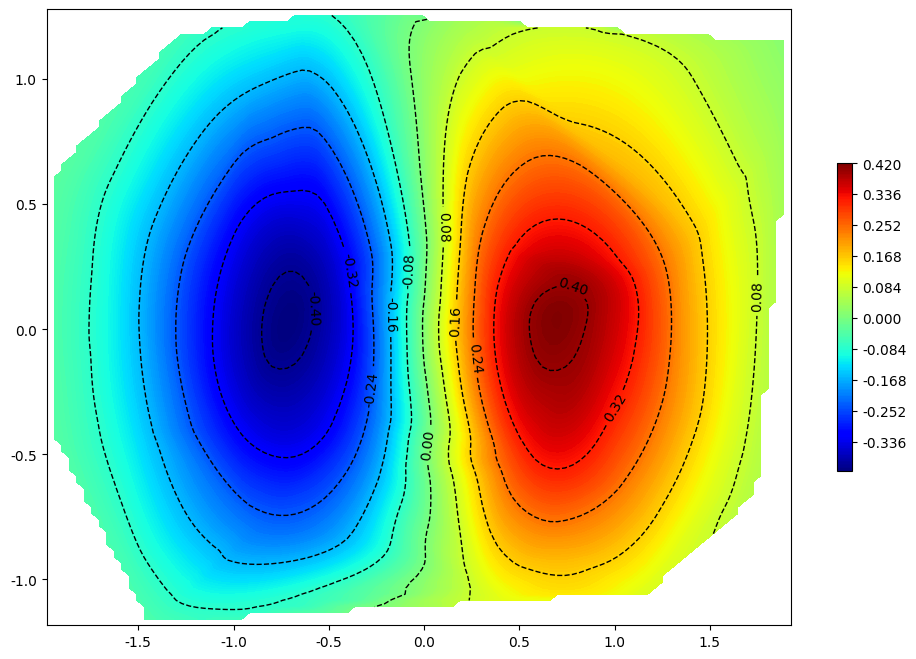

In [47]:
fig = plt.figure(figsize=(12,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

# 격자 데이터 X, Y에 대한 데이터와 높이를 나타내는 Z가 들어감.
# Data type of Z: 2nd array
# X, Y 대신 x, y를 넣어도 동일하게 동작
# levels of contour: 등고선의 개수 설정
# levels of contourf: 구분 색상 개수 설정 -  클수록 부드러운 색상 효과
# cmap: 옵션으로 색상 그라데이션 적용
contour1 = ax.contour(X, Y, Z, levels=10, colors='k', linewidths=1, linestyles='--') ## 등고선
contour2 = ax.contourf(X, Y, Z, levels=256, cmap='jet')

# clabel: 등고선 값을 텍스트로 삽입
# contour1: contour의 결과 matplotlib.contour.QuadContourSet 객체
# contour1.levels: level 지정
ax.clabel(contour1, contour1.levels, inline=True) ## contour 라벨
fig.colorbar(contour2, shrink=0.5) ## 컬러바 크기 축소 shrink
 
plt.show()

# 간격이 일정하지 않을 때

In [31]:
np.random.seed(100)
real_sample_size = 50
x = np.random.uniform(-2,2 , real_sample_size)
y = np.random.uniform(-1.3, 1.3, real_sample_size)
z = x*np.exp(-x**2-y**2)

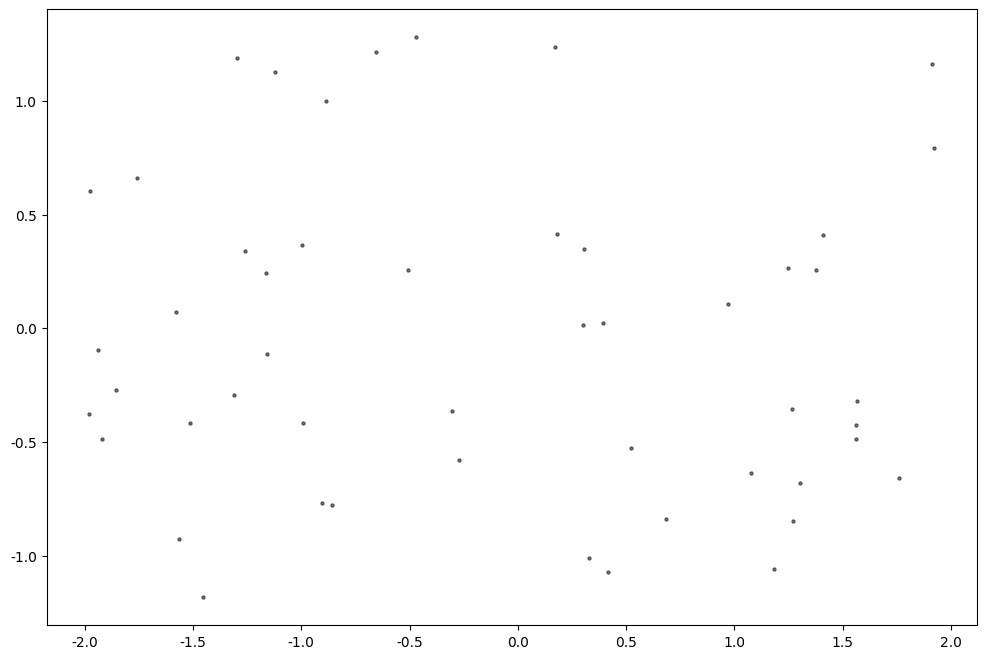

In [43]:
fig = plt.figure(figsize=(12,8))
# fig = plt.figure()
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(x, y, color='k', alpha=0.5, s=5) # alpha: 투명도, s: 점 크기
 
plt.show()

In [44]:
from scipy.interpolate import griddata
 
## 관측된 데이터를 이용하여 격자 데이터 생성
grid_size = 100
x_range = np.linspace(np.max(x), np.min(x), grid_size) ## x 범위
y_range = np.linspace(np.max(y), np.min(y), grid_size) ## y 범위
X, Y = np.meshgrid(x_range, y_range) ## XY 격자 데이터
Z = griddata(np.c_[x, y], z, (X, Y), method='cubic') ## Z 격자 데이터

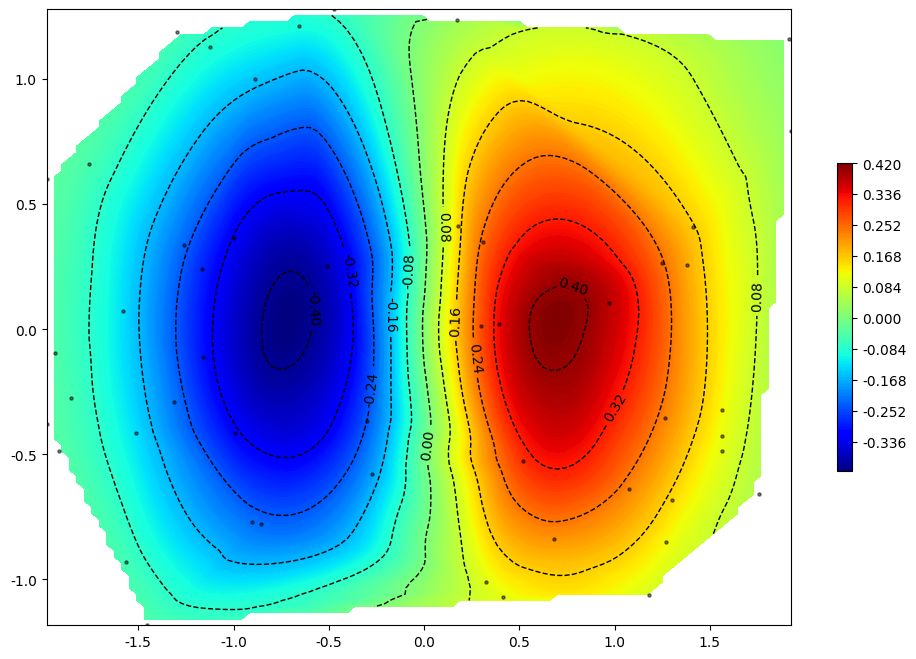

In [49]:
fig = plt.figure(figsize=(12,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
contour1 = ax.contour(X, Y, Z, levels=10, colors='k', linewidths=1, linestyles='--') ## 등고선
contour2 = ax.contourf(X, Y, Z, levels=256, cmap='jet')
 
ax.clabel(contour1, contour1.levels, inline=True) ## contour 라벨
fig.colorbar(contour2, shrink=0.5) ## 컬러바 크기 축소 shrink
 
ax.scatter(x, y, color='k', alpha=0.5, s=5) ## 산점도 추가
 
plt.show()